## 实验操作2.2  读取在线影像 基于URL
* 实验目的：通过url获取在线影像
* 实验数据：
    * Landsat影像被存储在AWS和Google Cloud 中，并且可以免费访问下载
* Code: 赵涔良

In [1]:
import rasterio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os 
os.environ ['HTTP_PROXY'] ='http://127.0.0.1:7890' #设置VPN的本地代理端口，示例为端口：7890
os.environ ['HTTPS_PROXY'] ='http://127.0.0.1:7890'

In [3]:
print('Landsat on AWS:')
filepath = 'http://landsat-pds.s3.amazonaws.com/c1/L8/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rasterio.open(filepath) as src:
 print(src.profile)

Landsat on AWS:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7821, 'height': 7951, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 204285.0,
       0.0, -30.0, 4268115.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}


Decimation factor= 81
array type:  <class 'numpy.ndarray'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Text(0, 0.5, 'iMG_Row')

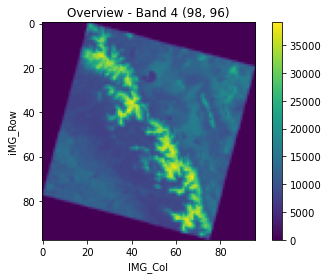

In [6]:
# 栅格网格可以作为 numpy 数组访问并绘制
with rasterio.open(filepath) as src:
    oviews = src.overviews(1) 
    oview = oviews[-1] # 概略图
    print('Decimation factor= {}'.format(oview))
    thumbnail = src.read(1, out_shape=(1, int(src.height // oview), int(src.width // oview)))
    
print('array type: ',type(thumbnail))
print(thumbnail)
 
plt.imshow(thumbnail)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(thumbnail.shape))
plt.xlabel('IMG_Col')
plt.ylabel('iMG_Row')

Text(0, 0.5, 'IMG_Row')

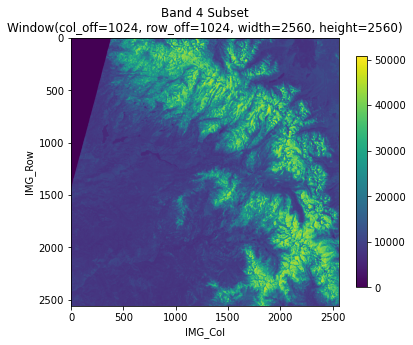

In [5]:
window = rasterio.windows.Window(1024, 1024, 2560, 2560) #下载该景影像的特定区域数据
 
with rasterio.open(filepath) as src:
 subset = src.read(1, window=window)
 
plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('IMG_Col')
plt.ylabel('IMG_Row')